In [2]:
import pandas as pd
import urllib.request

In [6]:
dataset_url = "https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment/download?datasetVersionNumber=4"
dataset_file = "../downloads/tweets.csv"

urllib.request.urlretrieve(dataset_url, dataset_file)

('../downloads/tweets.csv', <http.client.HTTPMessage at 0x7f833987a2b0>)

In [7]:
df = pd.read_csv(dataset_file)
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [8]:
import matplotlib.pyplot as plt

sentiment_column = 'airline_sentiment'

print("Count of ratings:")
print(df[sentiment_column].value_counts())
def map_sentiment(feeling):
    return {
        "positive": 1,
        "neutral": 0,
        "negative": -1
    }[feeling]

df['sentiment'] = df[sentiment_column].map(map_sentiment)

def plot_sentiment(image):
    plt.figure()
    pd.value_counts(image['sentiment']).plot.bar(title="Sentiment distribution in df")
    plt.xlabel("Sentiment")
    plt.ylabel("No. of rows in df")
    plt.show()

Count of ratings:
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


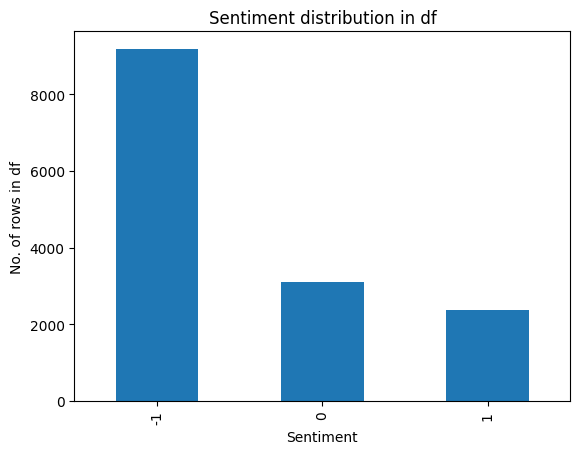

In [9]:
plot_sentiment(df)

In [10]:
def top_df(image, top_n=2300):
    df_positive = image[image['sentiment'] == 1].head(top_n)
    df_negative = image[image['sentiment'] == -1].head(top_n)
    df_neutral = image[image['sentiment'] == 0].head(top_n)
    df_small = pd.concat([df_positive, df_negative, df_neutral])
    return df_small

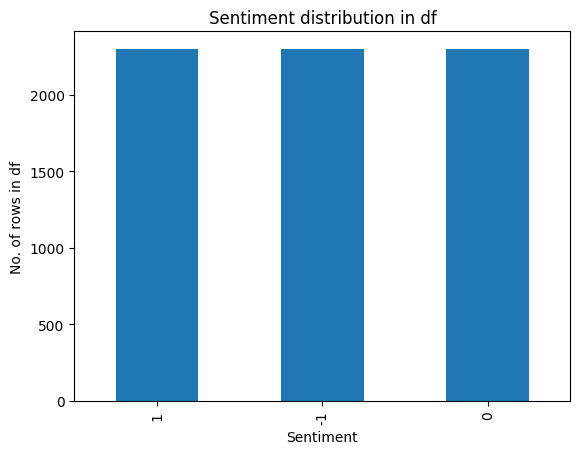

In [11]:
small_df = top_df(df)
plot_sentiment(small_df)

In [12]:
import unicodedata
import re

def tokenize(text, lowercase=False, deacc=False, errors="strict", to_lower=False, lower=False):
    """
    Iteratively yield tokens as unicode strings, removing accent marks
    and optionally lowercasing the unidoce string by assigning True
    to one of the parameters, lowercase, to_lower, or lower.

    Input text may be either unicode or utf8-encoded byte string.

    The tokens on output are maximal contiguous sequences of alphabetic
    characters (no digits!).

    >>> list(tokenize('Nic nemůže letět rychlostí vyšší, než 300 tisíc kilometrů za sekundu!', deacc = True))
    [u'Nic', u'nemuze', u'letet', u'rychlosti', u'vyssi', u'nez', u'tisic', u'kilometru', u'za', u'sekundu']

    """
    lowercase = lowercase or to_lower or lower
    if lowercase:
        text = text.lower()
    if deacc:
        nfkd_form = unicodedata.normalize('NFKD', text)
        text = unicodedata.normalize('ASCII', 'ignore')
    PAT_ALPHABETIC = re.compile('(((?![\d])\w)+)', re.UNICODE)
    for match in PAT_ALPHABETIC.finditer(text):
        yield match.group()


def simple_preprocess(doc, deacc=False, min_len=2, max_len=15):
    """
    Convert a document into a list of tokens.

    This lowercases, tokenizes, de-accents (optional). -- the output are final
    tokens = unicode strings, that won't be processed any further.

    """
    tokens = [
        token for token in tokenize(doc, lower=True, deacc=deacc, errors='ignore')
        if min_len <= len(token) <= max_len and not token.startswith('_')
    ]
    return tokens

In [13]:
small_df['tokenized_text'] = small_df['text'].map(simple_preprocess)
print(small_df['tokenized_text'].head(10))

1     [virginamerica, plus, you, ve, added, commerci...
6     [virginamerica, yes, nearly, every, time, fly,...
8             [virginamerica, well, didn, but, now, do]
9     [virginamerica, it, was, amazing, and, arrived...
11    [virginamerica, lt, pretty, graphics, so, much...
12    [virginamerica, this, is, such, great, deal, a...
13    [virginamerica, virginmedia, flying, your, fab...
14                              [virginamerica, thanks]
16    [virginamerica, so, excited, for, my, first, c...
18                              [flying, virginamerica]
Name: tokenized_text, dtype: object


# Learn more about Stemming and Lemmatization:
[Stemming and Lemmatization in Python](https://www.datacamp.com/tutorial/stemming-lemmatization-python)

In [14]:
import nltk
from nltk.stem import PorterStemmer

In [15]:
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens
small_df['stemmed_tokens'] = [[porter_stemmer.stem(word) for word in tokens] for tokens in small_df['tokenized_text'] ]
small_df['stemmed_tokens'].head(10)

1     [virginamerica, plu, you, ve, ad, commerci, to...
6     [virginamerica, ye, nearli, everi, time, fli, ...
8             [virginamerica, well, didn, but, now, do]
9     [virginamerica, it, wa, amaz, and, arriv, an, ...
11    [virginamerica, lt, pretti, graphic, so, much,...
12    [virginamerica, thi, is, such, great, deal, al...
13    [virginamerica, virginmedia, fli, your, fabul,...
14                               [virginamerica, thank]
16    [virginamerica, so, excit, for, my, first, cro...
18                                 [fli, virginamerica]
Name: stemmed_tokens, dtype: object

In [16]:
small_df[['sentiment', 'stemmed_tokens']].to_csv('saved.csv', quotechar='"', index=False)

In [30]:
small_df[['sentiment', 'stemmed_tokens']].to_csv('saved.csv', quotechar='"', index=False)